# Data Exploration and Cleaning

__Project Goal__

Compare recipes from two popular recipe websites, Spoonacular and Food.com, and identify "healthy" recipes using two market-implemented measures: Nutri-Scores and Weight Watchers (WW) Smart Points. The project will investigate recipe popularity, meal types, and cuisines.

__Scope__
* Nutritional values of interest: `calories`, `saturated fat`, `sugar`, and `protein`.
* Meal types: `breakfast`, `lunch`, and `dinner`.
* Cuisines

__Research Questions__
1. Are more popular / higher-rated recipes healthier? What is the health rating of the highest-rated recipes?
2. What meal type (i.e., breakfast, lunch, or dinner) have the healthiest / unhealthiest (percentage) recipes? What is the most popular ingredient for each meal?
3. Which cuisine has the healthiest recipes?

# Setup
This section contains the library imports and functions used throughout the project.

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

# Import functions notebook
%run functions.ipynb

In [3]:
# Import cleaned data
clean_recipes = pd.read_csv('Output/clean_recipes.csv')
clean_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,Protein (PDV),Saturated Fat (PDV),Carbohydrates (PDV),total_fat_g,sugar_g,sodium_g,protein_g,sat_fat_g,carbs_g,wws_points
0,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,...,22.0,35.0,1.0,11.70,0.0,0.408,11.0,7.0,3.0,-4
1,chinese chop suey,8559,70,4481,2001-01-27,"['weeknight', 'time-to-make', 'course', 'main-...","[395.4, 31.0, 20.0, 29.0, 51.0, 33.0, 8.0]",8,"['brown ground meat and onion in a large pot',...",easy one-pot dinner.,...,51.0,33.0,8.0,20.15,10.0,0.696,25.5,6.6,24.0,1
2,mennonite corn fritters,44045,15,41706,2002-10-25,"['15-minutes-or-less', 'time-to-make', 'course...","[67.1, 7.0, 2.0, 7.0, 3.0, 10.0, 1.0]",6,"['combine eggs , flour , baking powder , salt&...",ok - my heritage has been revealed. :) these a...,...,3.0,10.0,1.0,4.55,1.0,0.168,1.5,2.0,3.0,2
3,munch without guilt tomatoes,30300,10,6164,2002-06-04,"['15-minutes-or-less', 'time-to-make', 'course...","[3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",3,['put a slice of tomato on each biscuit / crac...,anytime munchies...another sweat free preparat...,...,0.0,0.0,0.0,0.00,0.5,0.000,0.0,0.0,0.0,1
4,now and later vegetarian empanadas,38276,90,37640,2002-08-26,"['weeknight', 'time-to-make', 'course', 'main-...","[477.1, 36.0, 24.0, 21.0, 26.0, 61.0, 18.0]",41,"['in a pot , cover carrots with water to cover...",this is from,...,26.0,61.0,18.0,23.40,12.0,0.504,13.0,12.2,54.0,20


# Meal Types

In [4]:
# Isolate 'breakfast, lunch, dinner' from clean_recipes
meal_df = clean_recipes.groupby(['meal_type']).mean(numeric_only=True)
meal_df = meal_df.drop(columns=['id', 'contributor_id'])
meal_df

,minutes,n_steps,n_ingredients,rating,Calories,Total Fat (PDV),Sugar (PDV),Sodium (PDV),Protein (PDV),Saturated Fat (PDV),Carbohydrates (PDV),total_fat_g,sugar_g,sodium_g,protein_g,sat_fat_g,carbs_g,wws_points
meal_type,,,,,,,,,,,,,,,,,,
breakfast,34.218673,9.929361,8.501843,4.602346,307.870639,24.731572,31.104423,18.845209,23.894963,32.546683,9.015971,16.075522,15.552211,0.452285,11.947482,6.509337,27.047912,18.127764
dinner,41.013367,10.159302,9.451958,4.611259,293.784038,23.647901,28.868218,16.647901,26.938670,29.593961,7.416889,15.371135,14.434109,0.399550,13.469335,5.918792,22.250668,14.716308
lunch,32.915344,9.166822,9.079676,4.598230,317.298195,23.845316,23.902894,22.116402,31.456894,28.529101,8.989107,15.499455,11.951447,0.530794,15.728447,5.705820,26.967320,10.183318


In [6]:
updated_types = clean_recipes['meal_type'].unique()
updated_types = ['breakfast', 'lunch', 'dinner']

# Breakfast
breakfast = clean_recipes.loc[clean_recipes['meal_type'] == "breakfast"].copy()
print(f'breakfast: {breakfast.shape}')

# Lunch
lunch = clean_recipes.loc[clean_recipes['meal_type'] == "lunch"].copy()
print(f'lunch: {lunch.shape}')

# Dinner
dinner = clean_recipes.loc[clean_recipes['meal_type'] == "dinner"].copy()
print(f'dinner: {dinner.shape}')

breakfast: (1628, 29)
lunch: (3213, 29)
dinner: (6359, 29)


breakfast R-value: 0.66
lunch R-value: 0.0
dinner R-value: 0.34
breakfast R-value: 0.66
lunch R-value: 0.0
dinner R-value: 0.34
breakfast R-value: 0.66
lunch R-value: 0.0
dinner R-value: 0.34


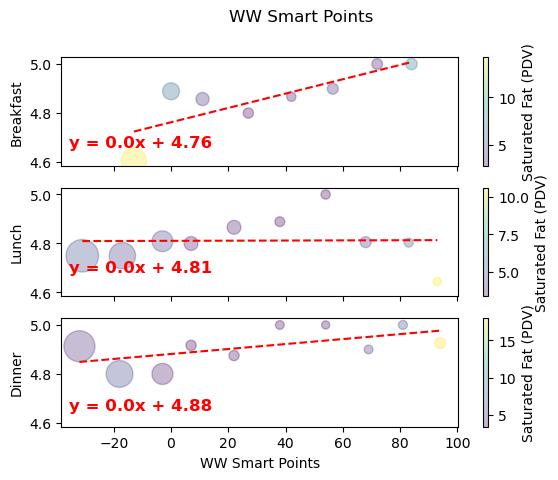

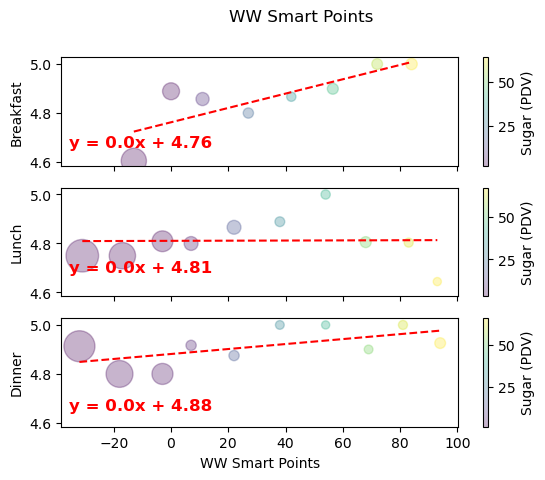

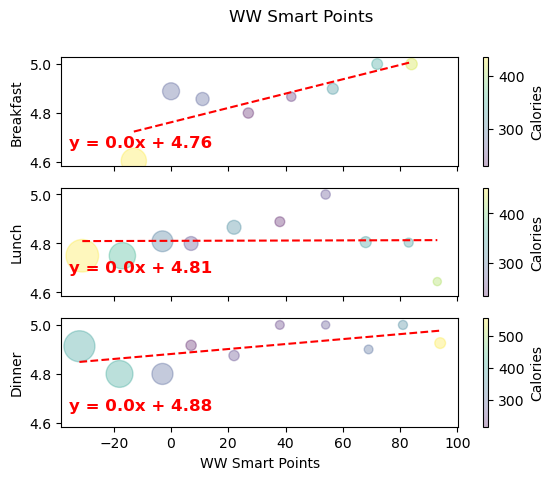

In [32]:

nutrition_list = ['Calories', 'Saturated Fat (PDV)', 'Sugar (PDV)']

def meal_plots(target_nutrition):
    fig, axs = plt.subplots(3, sharex=True, sharey=True)
    fig.suptitle("WW Smart Points")
    x_col = 'wws_points'
    y_col = 'rating'
    size_col = 'protein_g'
    df_list = [breakfast, lunch, dinner]
    
    for idx, val in enumerate(df_list):
        colour_col = target_nutrition
        # Bin by `wws_points`
        min_points = df_list[idx]['wws_points'].describe().min()
        max_points = df_list[idx]['wws_points'].describe().max()
        
        # Create bins
        points_bins = np.arange(min_points, max_points, 15) # 5 was good with less granular cuisines
        points_labels = [f'{points_bins[i]} to {points_bins[i+1]}' for i in range(len(points_bins)-1)]
        bins_df = pd.cut(df_list[idx]['wws_points'], bins=points_bins, labels=points_labels)
        
        # Set the index and its name
        points_df = df_list[idx].set_index(bins_df)
        points_df.index.name = "WWS Point Ranges"
        
        # Create grouped DataFrame by numeric means
        binned_df = points_df.groupby(['WWS Point Ranges']).median(numeric_only=True) # originally mean
        binned_df
    
        # Extract x- and y-values
        x = binned_df[x_col]
        y = binned_df[y_col]
        size = binned_df[size_col]
        colour = binned_df[colour_col]
    
        scatter_plot = axs[idx].scatter(x, y, s=size*10, alpha=0.3, c=colour)
        axs[2].set_xlabel('WW Smart Points')
        axs[idx].set_ylabel(updated_types[idx].title())
        cbar = plt.colorbar(scatter_plot)

        if (target_nutrition == "sat_fat_g"):
            bar_label = nutrition_list[1]
        elif (target_nutrition == "sugar_g"):
            bar_label = nutrition_list[2]
        else:        
            bar_label = target_nutrition
        cbar.set_label(bar_label)
    
        (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
        line_equation = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
        regression_values = slope * x + intercept
        axs[idx].plot(x, regression_values, linestyle='--', c='red')
        if idx == 0:
            x_coord, y_coord = 50, 240
        elif idx == 1:
            x_coord, y_coord = 50, 150
        elif idx == 2:
            x_coord, y_coord = 50, 50
        axs[idx].annotate(line_equation, xy=(x_coord, y_coord), xycoords='figure points',
            fontsize = 12, color='red', weight='bold')
    
        print(f'{updated_types[idx]} R-value: {round(rvalue**2, 2)}')
    
    fig.savefig(f'Meal types and WW Smart Points - {colour_col}.png')

meal_plots('sat_fat_g')
meal_plots('sugar_g')
meal_plots('Calories')

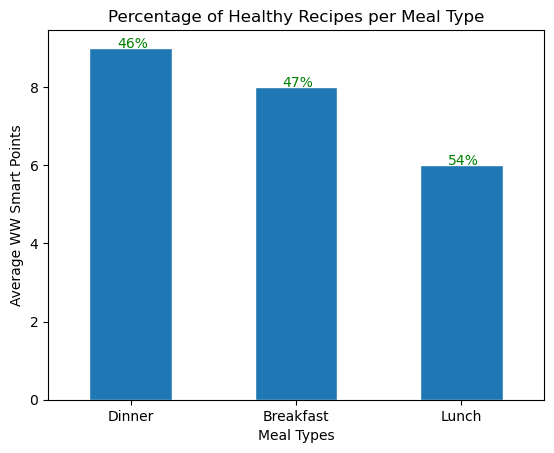

In [31]:
# Create a DataFrame grouped by the means of each cuisine
meal_df = clean_recipes.groupby(['meal_type']).median(numeric_only=True)

# Get percentage of "healthy" recipes per cuisine
# Set the limit as the median 'wws_points'
wws_median = clean_recipes['wws_points'].describe()['50%']

# Get the total number of recipes per cuisine
meal_count = clean_recipes.groupby(['meal_type'])['id'].count()

# Create a DataFrame of recipes that sit above the median 'wws_points'
healthy_count = clean_recipes.loc[clean_recipes['wws_points'] < wws_median]

# Create a groupby DataFrame that counts the number of healthy recipes
healthy_group = healthy_count.groupby(['meal_type'])['id'].count()

# Calculate the percentage value
percent_healthy = []
for idx in range(len(meal_count)):
    percent_healthy.append(int(healthy_group[idx] * 100 / meal_count[idx]))

# Create a DataFrame with calculated percentages, add the average WWS Points as a new column
percent_df = pd.DataFrame(percent_healthy, index=healthy_group.index, columns=['percent_healthy'])
percent_df['ave_wws_points'] = meal_df['wws_points']

# Sort the values and reset index to recover 'cuisine'
percent_df = percent_df.sort_values(by=['percent_healthy'], ascending=True).reset_index()

# Plot the bar chart
bar_chart = percent_df['ave_wws_points'].plot(
    kind = "bar",
    title = "Percentage of Healthy Recipes per Meal Type",
    edgecolor = "white")

# Set the labels
bar_chart.set_xlabel("Meal Types")
bar_chart.set_ylabel("Average WW Smart Points")
cuisine_titles = [word.title() for word in percent_df['meal_type']]
bar_chart.set_xticklabels(
    cuisine_titles,
    rotation_mode='default',
    rotation=0)

# Annotate the bar chart with the percentage values
for index, row in percent_df.iterrows():
    plt.annotate(
        f"{row['percent_healthy']}%", color="green",
        xy=(row.name, meal_df[meal_df.index == row['meal_type']]['wws_points']),
        xytext=(-10,0), textcoords='offset points')

# Cuisines

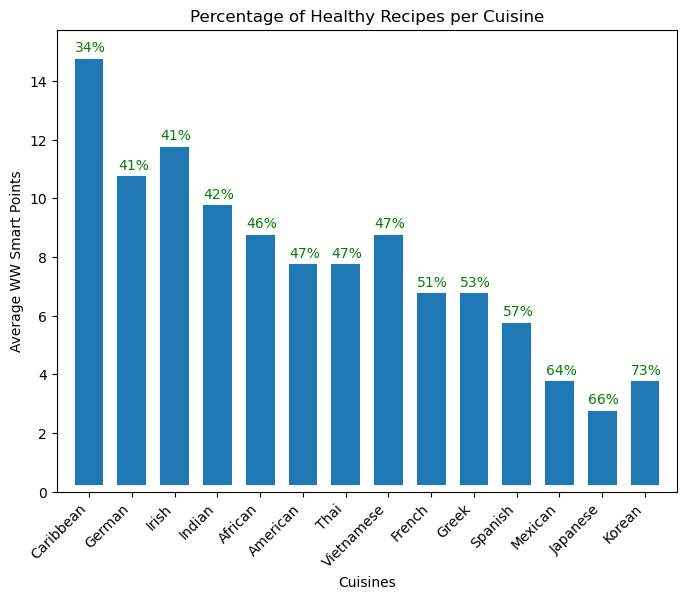

In [34]:
# Create a DataFrame grouped by the means of each cuisine
cuisine_df = clean_recipes.groupby(['cuisine']).median(numeric_only=True)

# Get percentage of "healthy" recipes per cuisine
# Set the limit as the median 'wws_points'
wws_median = clean_recipes['wws_points'].describe()['50%']

# Get the total number of recipes per cuisine
cuisine_count = clean_recipes.groupby(['cuisine'])['id'].count()

# Create a DataFrame of recipes that sit above the median 'wws_points'
healthy_count = clean_recipes.loc[clean_recipes['wws_points'] < wws_median]

# Create a groupby DataFrame that counts the number of healthy recipes
healthy_group = healthy_count.groupby(['cuisine'])['id'].count()

# Calculate the percentage value
percent_healthy = []
for idx in range(len(cuisine_count)):
    percent_healthy.append(int(healthy_group[idx] * 100 / cuisine_count[idx]))

# Create a DataFrame with calculated percentages, add the average WWS Points as a new column
percent_df = pd.DataFrame(percent_healthy, index=healthy_group.index, columns=['percent_healthy'])
percent_df['ave_wws_points'] = cuisine_df['wws_points']

# Sort the values and reset index to recover 'cuisine'
percent_df = percent_df.sort_values(by=['percent_healthy'], ascending=True).reset_index()

# Plot the bar chart
bar_chart = percent_df['ave_wws_points'].plot(
    kind = "bar",
    title = "Percentage of Healthy Recipes per Cuisine",
    figsize = (8,6),
    width = 1,
    linewidth = 10,
    edgecolor = "white")

# Set the labels
bar_chart.set_xlabel("Cuisines")
bar_chart.set_ylabel("Average WW Smart Points")
cuisine_titles = [word.title() for word in percent_df['cuisine']]
bar_chart.set_xticklabels(
    cuisine_titles,
    rotation_mode='default',
    rotation=45,
    ha='right')

# Annotate the bar chart with the percentage values
for index, row in percent_df.iterrows():
    plt.annotate(
        f"{row['percent_healthy']}%", color="green",
        xy=(row.name, cuisine_df[cuisine_df.index == row['cuisine']]['wws_points']),
        xytext=(-10,0), textcoords='offset points')

# Popularity